In [ ]:
v# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from pickle import TRUE
from google.colab import drive
drive.mount('/content/drive', force_remount= TRUE)
#definir la ruta del archivo CSV en google DRIVE


Mounted at /content/drive


In [ ]:
import os #estoy idnicando al colab que lo quiero trabajar con la carpeta DATASETS EN EL contendio de mi drive
os.chdir("/content/drive/MyDrive/ProyectoTechConsultas/datasets")

In [ ]:
os.listdir() # metod de Python para obtener lista de archivos y directorios en punto especifico o de un directorio que estoy trabajando

['consulta-previa-29022024.csv',
 'consulta-previa-31032024.csv',
 'consulta-previa-31052024.csv',
 'consulta-previa-30062024.csv',
 'consulta-previa-31072024.csv',
 'consulta-previa-31082024.csv',
 'consulta-previa-30092024.csv']

In [ ]:
list_arch=os.listdir() #aca estoy guardando mi lista de archivos

In [ ]:
conT = pd.concat(map(pd.read_csv, list_arch), ignore_index=True) #concateno todos los archivos que tengo para trabajar y hacer mi dataframe
conT.shape

(79932, 18)

In [ ]:
conT.head()

,fecha,Id Gestion,Codigo,Nombre POA,Es POMCAS,Nombre Ejecutor,Nombre Sector OJ,Nombre Sector,Nombre Estado,Comunidad,Departamento,Etapa,Municipio,Region,Estado Gestion,Etnia,Tipo Comunidad,Cantidad Pob Cert
0,29-02-24,0.0,PROY-00001,CONSTRUCCIÓN DEL SISTEMA DE INTERCONEXIÓN Y DI...,False,SURTIGAS SA ESP,NaN,HIDROCARBUROS,SEGUIMIENTO,CONSEJO COMUNITARIO DE COMUNIDADES NEGRAS TIER...,BOLIVAR,E08-SEGUIMIENTO,CARTAGENA,CARIBE,CUMPLIDA,AFRO,AFRODESCENDIENTE,1
1,29-02-24,0.0,PROY-00001,CONSTRUCCIÓN DEL SISTEMA DE INTERCONEXIÓN Y DI...,False,SURTIGAS SA ESP,NaN,HIDROCARBUROS,SEGUIMIENTO,CONSEJO COMUNITARIO DE COMUNIDADES NEGRAS DE C...,BOLIVAR,E09-CIERRE,CARTAGENA,CARIBE,CUMPLIDA,AFRO,AFRODESCENDIENTE,1
2,29-02-24,0.0,PROY-00001,CONSTRUCCIÓN DEL SISTEMA DE INTERCONEXIÓN Y DI...,False,SURTIGAS SA ESP,NaN,HIDROCARBUROS,SEGUIMIENTO,CONSEJO COMUNITARIO DE COMUNIDADES NEGRAS DE B...,BOLIVAR,E09-CIERRE,CARTAGENA,CARIBE,CUMPLIDA,AFRO,AFRODESCENDIENTE,1
3,29-02-24,0.0,PROY-00001,CONSTRUCCIÓN DEL SISTEMA DE INTERCONEXIÓN Y DI...,False,SURTIGAS SA ESP,NaN,HIDROCARBUROS,SEGUIMIENTO,CONSEJO COMUNITARIO DE LA COMUNIDAD NEGRA DE P...,BOLIVAR,E09-CIERRE,CARTAGENA,CARIBE,CUMPLIDA,AFRO,AFRODESCENDIENTE,1
4,29-02-24,0.0,PROY-00002,CINOBACTERIAS BENTONICAS ARRECIFALES,False,UNIVERSIDAD JORGE TADEO LOZANO,NaN,AMBIENTAL,CIERRE,RAIZAL DE PROVIDENCIA,SAN ANDRES Y PROVIDENCIA,E09-CIERRE,PROVIDENCIA,INSULAR,CUMPLIDA,RAIZAL,RAIZAL,1


datos tomados de

https://www.mininterior.gov.co/datos-abiertos/
sin embargo no hay literatura qu documente cada una de las variables a que hace refencia

In [ ]:
conT.isnull().sum()
#1. datos faltenates en algunas celdas
#2. columnas irrelevantes qeu no corresponden al problema que queremos resolver
#3. registros repetidos
#4. Valores extremos en el caso de variables numericas. se deben analizar en detalle pues no necesariamente la sl es eliminar
#5. errores tipograficos

,0
fecha,0
Id Gestion,34579
Codigo,0
Nombre POA,0
Es POMCAS,0
Nombre Ejecutor,0
Nombre Sector OJ,71371
Nombre Sector,0
Nombre Estado,0
Comunidad,0


In [ ]:
conT

,fecha,Id Gestion,Codigo,Nombre POA,Es POMCAS,Nombre Ejecutor,Nombre Sector OJ,Nombre Sector,Nombre Estado,Comunidad,Departamento,Etapa,Municipio,Region,Estado Gestion,Etnia,Tipo Comunidad,Cantidad Pob Cert
0,29-02-24,0.0,PROY-00001,CONSTRUCCIÓN DEL SISTEMA DE INTERCONEXIÓN Y DI...,False,SURTIGAS SA ESP,NaN,HIDROCARBUROS,SEGUIMIENTO,CONSEJO COMUNITARIO DE COMUNIDADES NEGRAS TIER...,BOLIVAR,E08-SEGUIMIENTO,CARTAGENA,CARIBE,CUMPLIDA,AFRO,AFRODESCENDIENTE,1
1,29-02-24,0.0,PROY-00001,CONSTRUCCIÓN DEL SISTEMA DE INTERCONEXIÓN Y DI...,False,SURTIGAS SA ESP,NaN,HIDROCARBUROS,SEGUIMIENTO,CONSEJO COMUNITARIO DE COMUNIDADES NEGRAS DE C...,BOLIVAR,E09-CIERRE,CARTAGENA,CARIBE,CUMPLIDA,AFRO,AFRODESCENDIENTE,1
2,29-02-24,0.0,PROY-00001,CONSTRUCCIÓN DEL SISTEMA DE INTERCONEXIÓN Y DI...,False,SURTIGAS SA ESP,NaN,HIDROCARBUROS,SEGUIMIENTO,CONSEJO COMUNITARIO DE COMUNIDADES NEGRAS DE B...,BOLIVAR,E09-CIERRE,CARTAGENA,CARIBE,CUMPLIDA,AFRO,AFRODESCENDIENTE,1
3,29-02-24,0.0,PROY-00001,CONSTRUCCIÓN DEL SISTEMA DE INTERCONEXIÓN Y DI...,False,SURTIGAS SA ESP,NaN,HIDROCARBUROS,SEGUIMIENTO,CONSEJO COMUNITARIO DE LA COMUNIDAD NEGRA DE P...,BOLIVAR,E09-CIERRE,CARTAGENA,CARIBE,CUMPLIDA,AFRO,AFRODESCENDIENTE,1
4,29-02-24,0.0,PROY-00002,CINOBACTERIAS BENTONICAS ARRECIFALES,False,UNIVERSIDAD JORGE TADEO LOZANO,NaN,AMBIENTAL,CIERRE,RAIZAL DE PROVIDENCIA,SAN ANDRES Y PROVIDENCIA,E09-CIERRE,PROVIDENCIA,INSULAR,CUMPLIDA,RAIZAL,RAIZAL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79927,30-09-24,NaN,PROY-03116,CONSTRUCCIÓN DE LA INTERCONEXIÓN ELÉCTRICA EN...,False,EMPRESA DISTRIBUIDORA DEL PACIFICO S.A. E.S.P....,NaN,ELECTRICO,ACTIVO,CONSEJO COMUNITARIO MAYOR DEL MEDIO ATRATO (ACIA),CHOCO,E01-POR INICIAR,MEDIO ATRATO,PACIFICA,CUMPLIDA,AFRO,AFRODESCENDIENTE,1
79928,30-09-24,NaN,PROY-03117,RESTABLECIMIENTO DE DERECHOS NNA KAREN DAYANA...,False,INSTITUTO COLOMBIANO DE BIENESTAR FAMILIAR - ICBF,NaN,MEDIDA ADMINISTRATIVA,ACTIVO,RESGUARDO INDÍGENA EL VIGIA,ARAUCA,E01-POR INICIAR,ARAUQUITA,ORINOQUÍA,CUMPLIDA,MAKAGUAN,INDÍGENA,1
79929,30-09-24,NaN,PROY-03118,RESTABLECIMIENTO DE DERECHOS NNA OMAIRA LUZ M...,False,INSTITUTO COLOMBIANO DE BIENESTAR FAMILIAR - ICBF,NaN,MEDIDA ADMINISTRATIVA,ACTIVO,RESGUARDO INDÍGENA EL VIGIA,ARAUCA,E01-POR INICIAR,ARAUQUITA,ORINOQUÍA,CUMPLIDA,MAKAGUAN,INDÍGENA,1
79930,30-09-24,NaN,PROY-03119,CHO.MESOPOTAMIA,False,SITES LATAM COLOMBIA S.A.S.,NaN,TELECOMUNICACIONES,ACTIVO,CONSEJO COMUNITARIO MAYOR DEL MEDIO ATRATO (ACIA),CHOCO,E01-POR INICIAR,BOJAYA,PACIFICA,CUMPLIDA,AFRO,AFRODESCENDIENTE,1


Análisis Individual

In [ ]:
import warnings
# Ignorar advertencias específicas de matplotlib
warnings.filterwarnings("ignore", category=UserWarning)





<ipython-input-11-77e33971c1a5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=conT, ax=ax[i], palette=colors);
<ipython-input-11-77e33971c1a5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=conT, ax=ax[i], palette=colors);
<ipython-input-11-77e33971c1a5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=conT, ax=ax[i], palette=colors);
<ipython-input-11-77e33971c1a5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` vari

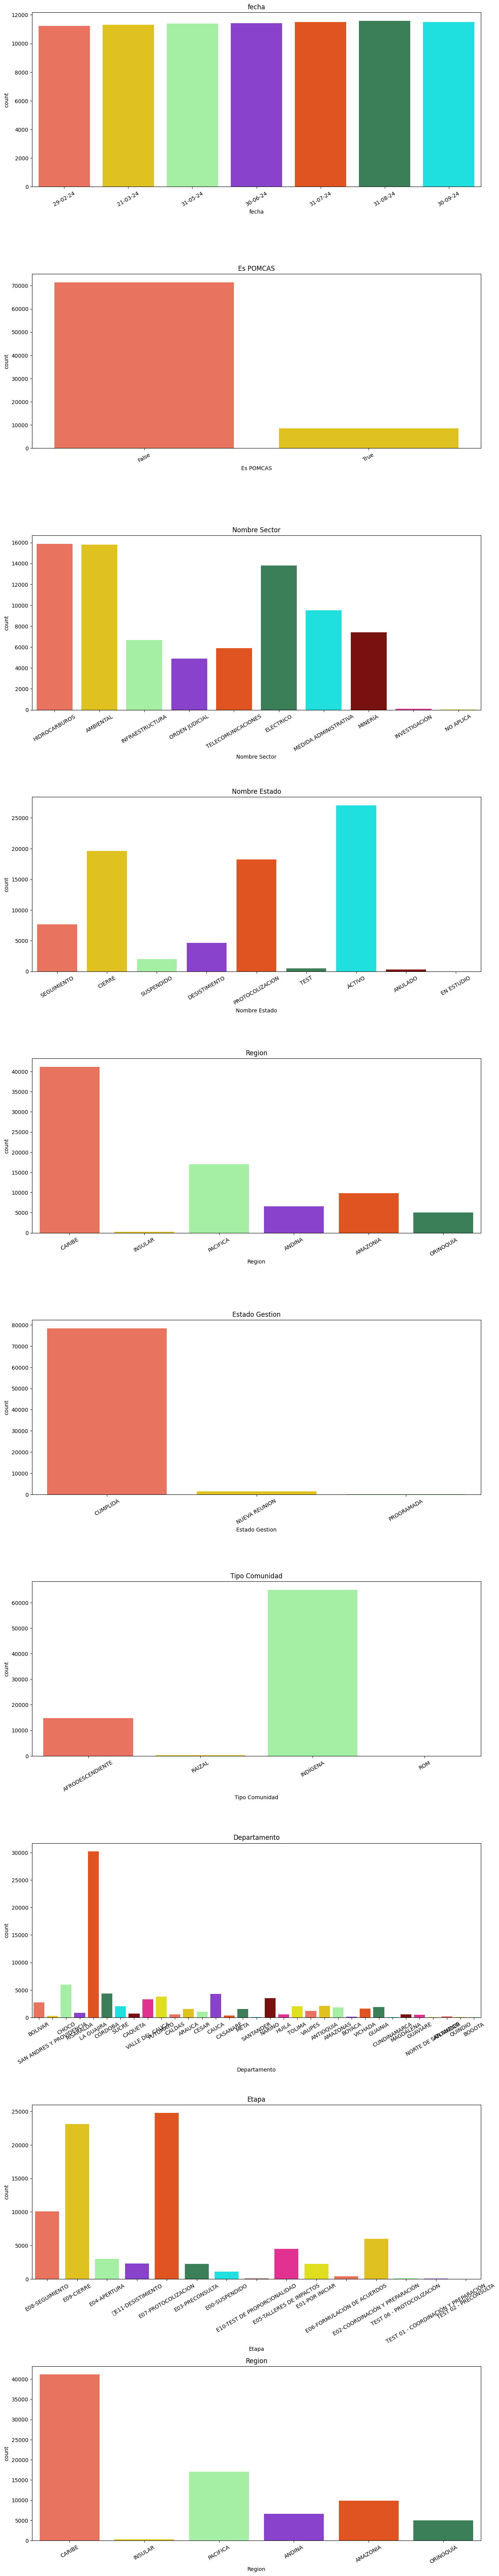

In [ ]:
# Tomemos las variables  y generemos gráficos de barras
col_cat =["fecha","Es POMCAS", "Nombre Sector", "Nombre Estado", "Region", "Estado Gestion", "Tipo Comunidad", "Departamento", "Etapa", "Region"]

# Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(15,85));
fig.subplots_adjust(hspace=0.5);


colors = ['#FF6347', '#FFD700', '#98FB98', '#8A2BE2', '#FF4500',
          '#2E8B57', '#00FFFF', '#8B0000', '#FF1493', '#FFFF00'];

for i, col in enumerate(col_cat):
  sns.countplot(x=col, data=conT, ax=ax[i], palette=colors);
  ax[i].set_title(col);
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30);

In [ ]:
conT["fecha"].value_counts() #7 subcategorias

,count
fecha,
31-08-24,11591
30-09-24,11496
31-07-24,11492
30-06-24,11419
31-05-24,11389
21-03-24,11306
29-02-24,11239


In [ ]:
conT["Nombre POA"].value_counts() #3107 subcategorias

,count
Nombre POA,
CUMPLIMIENTO DE LA SENTENCIA T-704 ORDEN 5A,2796
CUMPLIMIENTO DE LA SENTENCIA T-704 - 2016 ORDEN 4A,2796
ACTUALIZACIÓN DEL PLAN DE ORDENACIÓN Y MANEJO DE LA CUENCA HIDROGRÁFICA DEL RÍO RANCHERÍA EN EL DEPARTAMENTO DE LA GUAJIRA,1547
LINEAS DE TRANSMISIÓN ASOCIADAS A LA CONEXIÓN COLECTORA 1 – CUESTECITAS A 500 KV,1533
AJUSTE DEL PLAN DE ORDENACION Y MANEJO DE LA CUENCA HIDROGRAFICA MEDIA -BAJA DEL RIO SINU,1393
...,...
CHO.PUERTO MORENO,1
CHO.BEBEDO,1
CHO. CHIVIGUIDO,1


In [ ]:
conT["Es POMCAS"].value_counts() #falso y verdadero

,count
Es POMCAS,
False,71455
True,8477


In [ ]:
conT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79932 entries, 0 to 79931
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fecha              79932 non-null  object 
 1   Id Gestion         45353 non-null  float64
 2   Codigo             79932 non-null  object 
 3   Nombre POA         79932 non-null  object 
 4   Es POMCAS          79932 non-null  bool   
 5   Nombre Ejecutor    79932 non-null  object 
 6   Nombre Sector OJ   8561 non-null   object 
 7   Nombre Sector      79932 non-null  object 
 8   Nombre Estado      79932 non-null  object 
 9   Comunidad          79932 non-null  object 
 10  Departamento       79932 non-null  object 
 11  Etapa              79932 non-null  object 
 12  Municipio          79932 non-null  object 
 13  Region             79932 non-null  object 
 14  Estado Gestion     79932 non-null  object 
 15  Etnia              74626 non-null  object 
 16  Tipo Comunidad     799

In [ ]:
conT["Nombre Ejecutor"].value_counts()

,count
Nombre Ejecutor,
INSTITUTO COLOMBIANO DE BIENESTAR FAMILIAR - ICBF,4053
CORPORACION AUTONOMA REGIONAL DE LA GUAJIRA - CORPOGUAJIRA,3880
CARBONES CERREJON LIMITED,3736
ECOPETROL S.A.,3598
HOCOL SA,2843
...,...
EMPRESA DISTRIBUIDORA DEL PACIFICO S.A. E.S.P. DISPAC S.A E.S.P,3
EMPRESA AGROMINERA Y AMBIENTAL UNION PANAMERICANA S.A.S.- EMAGROAUP,2
HERNANDO MONTOYA CADAVID,2


In [ ]:
conT["Nombre POA"].value_counts()

,count
Nombre POA,
CUMPLIMIENTO DE LA SENTENCIA T-704 ORDEN 5A,2796
CUMPLIMIENTO DE LA SENTENCIA T-704 - 2016 ORDEN 4A,2796
ACTUALIZACIÓN DEL PLAN DE ORDENACIÓN Y MANEJO DE LA CUENCA HIDROGRÁFICA DEL RÍO RANCHERÍA EN EL DEPARTAMENTO DE LA GUAJIRA,1547
LINEAS DE TRANSMISIÓN ASOCIADAS A LA CONEXIÓN COLECTORA 1 – CUESTECITAS A 500 KV,1533
AJUSTE DEL PLAN DE ORDENACION Y MANEJO DE LA CUENCA HIDROGRAFICA MEDIA -BAJA DEL RIO SINU,1393
...,...
CHO.PUERTO MORENO,1
CHO.BEBEDO,1
CHO. CHIVIGUIDO,1


In [ ]:
conT["Nombre Sector OJ"].value_counts()

,count
Nombre Sector OJ,
MEDIDA ADMINISTRATIVA,2394
RESTABLECIMIENTO DE DERECHOS,2084
MINERIA,1899
ETNOEDUCACION,788
INFRAESTRUCTURA,418
HIDROCARBUROS,360
AMBIENTAL,196
INFRAESTRUCTURA VIAL,164
ELECTRICO,158


In [ ]:
conT["Nombre Sector"].value_counts()

,count
Nombre Sector,
HIDROCARBUROS,15883
AMBIENTAL,15801
ELECTRICO,13786
MEDIDA ADMINISTRATIVA,9513
MINERÍA,7416
INFRAESTRUCTURA,6674
TELECOMUNICACIONES,5882
ORDEN JUDICIAL,4883
INVESTIGACIÓN,80


In [ ]:
conT["Nombre Estado"].value_counts()# aplicarle el metodo on hot para convertir esta columna categorica en numerica

,count
Nombre Estado,
ACTIVO,27057
CIERRE,19595
PROTOCOLIZACION,18253
SEGUIMIENTO,7647
DESISTIMIENTO,4620
SUSPENDIDO,2006
TEST,457
ANULADO,292
EN ESTUDIO,5


In [ ]:
conT["Region"].value_counts()# aplicarle el metodo on hot para convertir esta columna categorica en numerica

,count
Region,
CARIBE,41158
PACIFICA,17060
AMAZONIA,9856
ANDINA,6587
ORINOQUÍA,5012
INSULAR,259


In [ ]:
conT["Comunidad"].value_counts()

,count
Comunidad,
PUEBLOS INDIGENAS DE LA SIERRA NEVADA DE SANTA MARTA,728
RESGUARDO INDIGENA PARTE ORIENTAL DEL VAUPES,293
RESGUARDO EL VIGIA,210
ACADESAN - CONSEJO COMUNITARIO GENERAL DE SAN JUAN,182
CONSEJO COMUNITARIO MAYOR DEL MEDIO ATRATO - ACIA- COCOMACIA,175
...,...
CONSEJO COMUNITARIO BOCAS DE CANÁ,1
RESGUARDO INDÍGENA VEGAS DE SEGOVIA,1
RESGUARDO INDÍGENA SABANAS DE SAN ANGEL,1


In [ ]:
conT["Departamento"].value_counts()

,count
Departamento,
LA GUAJIRA,30201
CHOCO,5930
CORDOBA,4374
CAUCA,4291
PUTUMAYO,3773
NARINO,3523
VALLE DEL CAUCA,3316
BOLIVAR,2716
ANTIOQUIA,2118


In [ ]:
conT["Etapa"].value_counts()

,count
Etapa,
E07-PROTOCOLIZACION,24771
E09-CIERRE,23077
E08-SEGUIMIENTO,10094
E02-COORDINACIÓN Y PREPARACIÓN,5991
E05-TALLERES DE IMPACTOS,4472
E04-APERTURA,3005
\tE11-DESISTIMIENTO,2279
E03-PRECONSULTA,2272
E01-POR INICIAR,2256


In [ ]:
conT["Municipio"].value_counts()

,count
Municipio,
URIBIA,12181
MAICAO,6305
RIOHACHA,6207
SIN MUNICIPIO,3388
MANAURE,3164
...,...
BUCARAMANGA,7
FILADELFIA,7
CURUMANI,7


In [ ]:
conT["Region"].value_counts()

,count
Region,
CARIBE,41158
PACIFICA,17060
AMAZONIA,9856
ANDINA,6587
ORINOQUÍA,5012
INSULAR,259


In [ ]:
conT["Estado Gestion"].value_counts()

,count
Estado Gestion,
CUMPLIDA,78388
NUEVA REUNION,1484
PROGRAMADA,60


In [ ]:
conT["Etnia"].value_counts()

,count
Etnia,
WAYUU,28788
AFRO,14665
ZENU,6221
SIN ETNIA,2275
AWA,1804
...,...
"AWA, COREGUAJE, EMBERA, MBERA KATIO,INGA, KAMËNTSA, KOFAN, NASA, SIONA, UITOTO",7
ROM,7
SIKUANI,7


In [ ]:
conT["Tipo Comunidad"].value_counts()

,count
Tipo Comunidad,
INDÍGENA,64952
AFRODESCENDIENTE,14721
RAIZAL,252
ROM,7


In [ ]:
conT["Cantidad Pob Cert"].value_counts()

,count
Cantidad Pob Cert,
1,76173
4,1162
2,532
3,357
6,161
5,147
8,105
7,84
14,84


In [ ]:
import plotly.graph_objects as go
fig5=go.Figure()

In [ ]:
a=conT["Nombre Sector"].unique()
b=conT["Nombre Sector"].value_counts().tolist()
print(a)
print(b)


fig5.add_traces(go.Pie(
    labels=conT["Nombre Sector"].unique(),
    values=conT["Nombre Sector"].value_counts().tolist()
))

['HIDROCARBUROS' 'AMBIENTAL' 'INFRAESTRUCTURA' 'ORDEN JUDICIAL'
 'TELECOMUNICACIONES' 'ELECTRICO' 'MEDIDA ADMINISTRATIVA' 'MINERÍA'
 'INVESTIGACIÓN' 'NO APLICA']
[15883, 15801, 13786, 9513, 7416, 6674, 5882, 4883, 80, 14]


In [ ]:
import plotly.graph_objects as go
fig7=go.Figure()

In [ ]:
f=conT["Nombre Estado"].unique()
g=conT["Nombre Estado"].value_counts().tolist()
print(f)
print(g)


fig7.add_traces(go.Pie(
    labels=conT["Nombre Estado"].unique(),
    values=conT["Nombre Estado"].value_counts().tolist()
))

['SEGUIMIENTO' 'CIERRE' 'SUSPENDIDO' 'DESISTIMIENTO' 'PROTOCOLIZACION'
 'TEST' 'ACTIVO' 'ANULADO' 'EN ESTUDIO']
[27057, 19595, 18253, 7647, 4620, 2006, 457, 292, 5]


In [ ]:
import plotly.graph_objects as go
fig4= go.Figure()

In [ ]:
x=conT["Region"].unique()
y=conT["Region"].value_counts().tolist()
print(x)
print(y)


fig4.add_traces(go.Pie(
    labels= x ,
    values=y ))

['CARIBE' 'INSULAR' 'PACIFICA' 'ANDINA' 'AMAZONIA' 'ORINOQUÍA']
[41158, 17060, 9856, 6587, 5012, 259]


In [ ]:
import plotly.graph_objects as go
fig8=go.Figure()

In [ ]:
z=conT["Estado Gestion"].unique()
w=conT["Estado Gestion"].value_counts().tolist()
print(z)
print(w)


fig8.add_traces(go.Pie(
    labels=z,
    values=w
))

['CUMPLIDA' 'NUEVA REUNION' 'PROGRAMADA']
[78388, 1484, 60]


In [ ]:
conT.head()
conT.shape

(79932, 18)

In [ ]:
#conT = pd.concat(map(pd.read_csv, list_arch), ignore_index=True)
#conT.shape

In [ ]:
import plotly.graph_objects as go
fig9=go.Figure()

In [ ]:
values = conT["Tipo Comunidad"].value_counts()
j=values.index.tolist()
k=values.tolist()
print(j)
print(k)

fig9.add_traces(go.Pie(
   labels=j,
    values=k))


['INDÍGENA', 'AFRODESCENDIENTE', 'RAIZAL', 'ROM']
[64952, 14721, 252, 7]


**OBSERVACIONES**
Niveles de cada variable
- Fecha: 7 (29-02.24, 21-03-24, 31-05-24, 30-06-24, 31-07,24, 31-08-24, 30-09-24 )
- Es POMCAS(plan de ordenamiento y manejo de cuencas hidrográficas) : 2 (TRUE, FALSE)
- Nombre Sector: 10 (Hidrocarburos, Ambiental, Infraestructura, orden juidicial, telecomuncaciones, electrico, medidad administrativa, mineria, investigación, N/A)
-Nombre Estado: 9 (Seguimiento, Cierre, suspendido, desistimiento, protocolizacion, test, activo, anulado, en estudio)
-Region: 6 (Caribe, insular, pacifica, andina, amazonia, orinoquia)
-Estado Gestion: 3 (cumplida, nueva reunion, programada)
-Tipo Comunidad: 4 (afrodescendiente, raizal, indigena, ROM)
-Departamento: 33 subcategorias
-Etapa: 15 categorias
-Municipio: 424subcategorias
-Etnia: 131 subcategorias
-Tipo Comunidad: 4 subcategorias
- Cantidad Pob Cert: 57 subcategorias

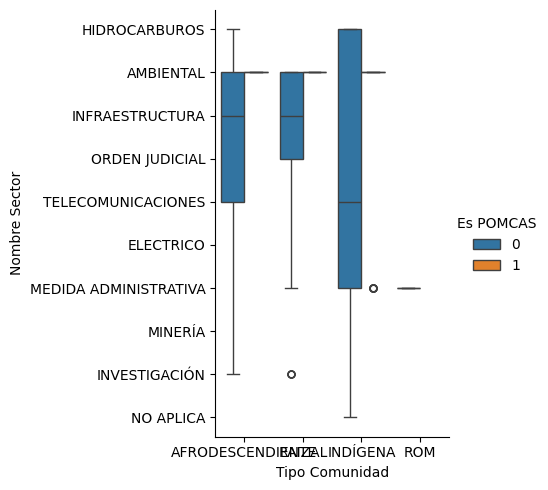

In [ ]:
sns.catplot(data=conT,
            x="Tipo Comunidad", #eje x puede ser categorico
            kind="box",
            y="Nombre Sector", #eje y debe ser numerico
            hue="Es POMCAS"); #discriminamos por fumador o no fumador

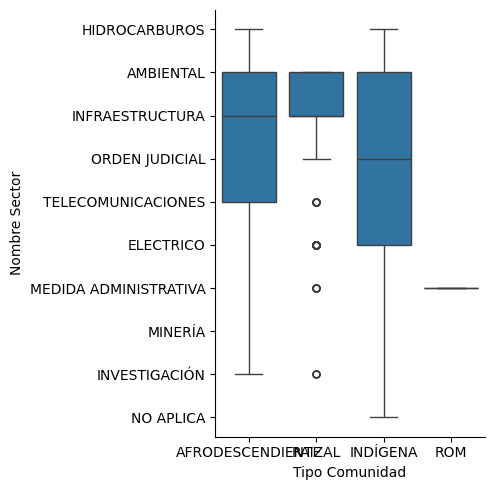

In [ ]:

sns.catplot(data=conT,
            x="Tipo Comunidad", #eje x puede ser categorico
            kind="box",
            y="Nombre Sector"); #discriminamos por fumador o no fumador

In [ ]:
#eliinemos columnas que  no necesitemos
conT.drop(columns=['Id Gestion','Codigo','Nombre Sector OJ', 'Comunidad', 'Municipio', 'Etnia', "Cantidad Pob Cert"],inplace=True)
conT.columns

Index(['fecha', 'Nombre POA', 'Es POMCAS', 'Nombre Ejecutor', 'Nombre Sector',
       'Nombre Estado', 'Departamento', 'Etapa', 'Region', 'Estado Gestion',
       'Tipo Comunidad'],
      dtype='object')

In [ ]:
print("\nProporción de datos faltantes en cada columna:")
print(conT.isnull().sum())


Proporción de datos faltantes en cada columna:
fecha              0
Nombre POA         0
Es POMCAS          0
Nombre Ejecutor    0
Nombre Sector      0
Nombre Estado      0
Departamento       0
Etapa              0
Region             0
Estado Gestion     0
Tipo Comunidad     0
dtype: int64


In [ ]:
conT.shape

(79932, 11)

 #vamos a coger una varible categorica y la volvemos entera con GET DUMMIES
 # aplicarle el metodo on hot para convertir esta columna categorica en numerica

In [ ]:
#usamos get dummy para converetir variable categorica en booleana
TipoCom_dummy = pd.get_dummies(conT["Tipo Comunidad"], prefix= "Tipo Comunidad")


In [ ]:
#concatenamos  las nuevas columnas boolenas al dataframe inicial
conT=pd.concat([conT, TipoCom_dummy], axis=1)

In [ ]:
conT.info() #quedmos con las 18 columnas como las iniciales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79932 entries, 0 to 79931
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   fecha                            79932 non-null  object
 1   Nombre POA                       79932 non-null  object
 2   Es POMCAS                        79932 non-null  bool  
 3   Nombre Ejecutor                  79932 non-null  object
 4   Nombre Sector                    79932 non-null  object
 5   Nombre Estado                    79932 non-null  object
 6   Departamento                     79932 non-null  object
 7   Etapa                            79932 non-null  object
 8   Region                           79932 non-null  object
 9   Estado Gestion                   79932 non-null  object
 10  Tipo Comunidad                   79932 non-null  object
 11  Tipo Comunidad_AFRODESCENDIENTE  79932 non-null  bool  
 12  Tipo Comunidad_INDÍGENA         

**Variables predictoras, Categoricas**
Es POMCAS,
Tipo Comunida_AFORDESCENDIENTE,
Tipo Comunidad_INDIGENA,
Tipo_comunidad_Raizaal,
Tipo_comunidad_ROM,
todas la anteriores son boleanas por lo que las convertiremos en int64 para ahcer analisi descriptivo de ellas

In [ ]:
#COVNETIMOS COLUMNAS BOOLEANAS EN ENTERAS
conT["Es POMCAS"] = conT["Es POMCAS"].astype(int)
conT["Tipo Comunidad_AFRODESCENDIENTE"] = conT["Tipo Comunidad_AFRODESCENDIENTE"].astype(int)
conT["Tipo Comunidad_INDÍGENA"] = conT["Tipo Comunidad_INDÍGENA"].astype(int)
conT["Tipo Comunidad_RAIZAL"] = conT["Tipo Comunidad_RAIZAL"].astype(int)
conT["Tipo Comunidad_ROM"] = conT["Tipo Comunidad_ROM"].astype(int)

In [ ]:
conT.info() #verificamos que las variables de interes si sean de tipo entero

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79932 entries, 0 to 79931
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   fecha                            79932 non-null  object
 1   Nombre POA                       79932 non-null  object
 2   Es POMCAS                        79932 non-null  int64 
 3   Nombre Ejecutor                  79932 non-null  object
 4   Nombre Sector                    79932 non-null  object
 5   Nombre Estado                    79932 non-null  object
 6   Departamento                     79932 non-null  object
 7   Etapa                            79932 non-null  object
 8   Region                           79932 non-null  object
 9   Estado Gestion                   79932 non-null  object
 10  Tipo Comunidad                   79932 non-null  object
 11  Tipo Comunidad_AFRODESCENDIENTE  79932 non-null  int64 
 12  Tipo Comunidad_INDÍGENA         

In [ ]:
conT.describe() #varibales ccon datos boleanos pasados a enteros solo arrojan media y desviacin estandar, min y max

,Es POMCAS,Tipo Comunidad_AFRODESCENDIENTE,Tipo Comunidad_INDÍGENA,Tipo Comunidad_RAIZAL,Tipo Comunidad_ROM
count,79932.000000,79932.000000,79932.000000,79932.000000,79932.000000
mean,0.106053,0.184169,0.812591,0.003153,0.000088
std,0.307907,0.387624,0.390242,0.056061,0.009358
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

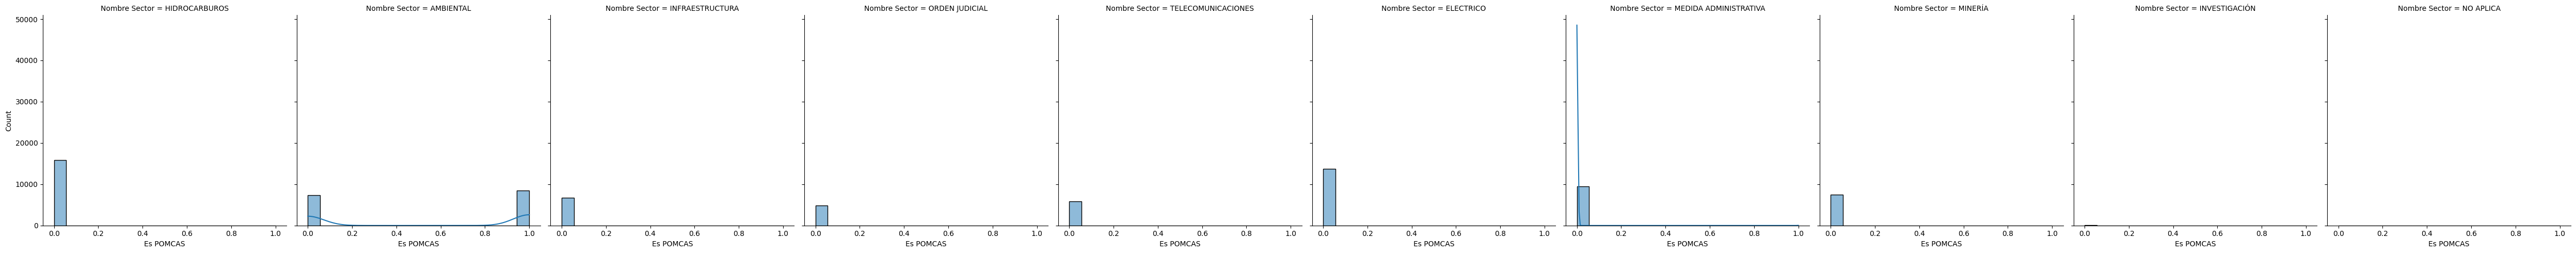

In [ ]:

sns.displot(data=conT,
            x="Es POMCAS", #POMCAS plan de ordenamiento y  manejo de cuencas hidrograficas
            kde=True, f
            col="Nombre Sector");

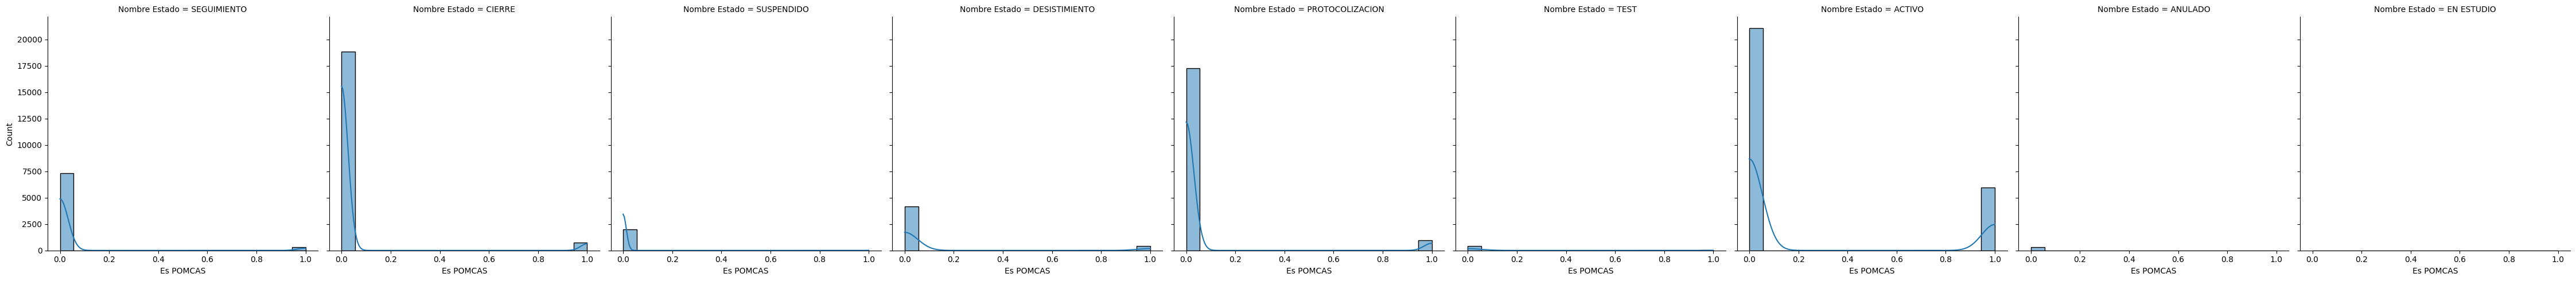

In [ ]:

sns.displot(data=conT,
            x="Es POMCAS", #POMCAS plan de ordenamiento y  manejo de cuencas hidrograficas
            kde=True,
            col="Nombre Estado");

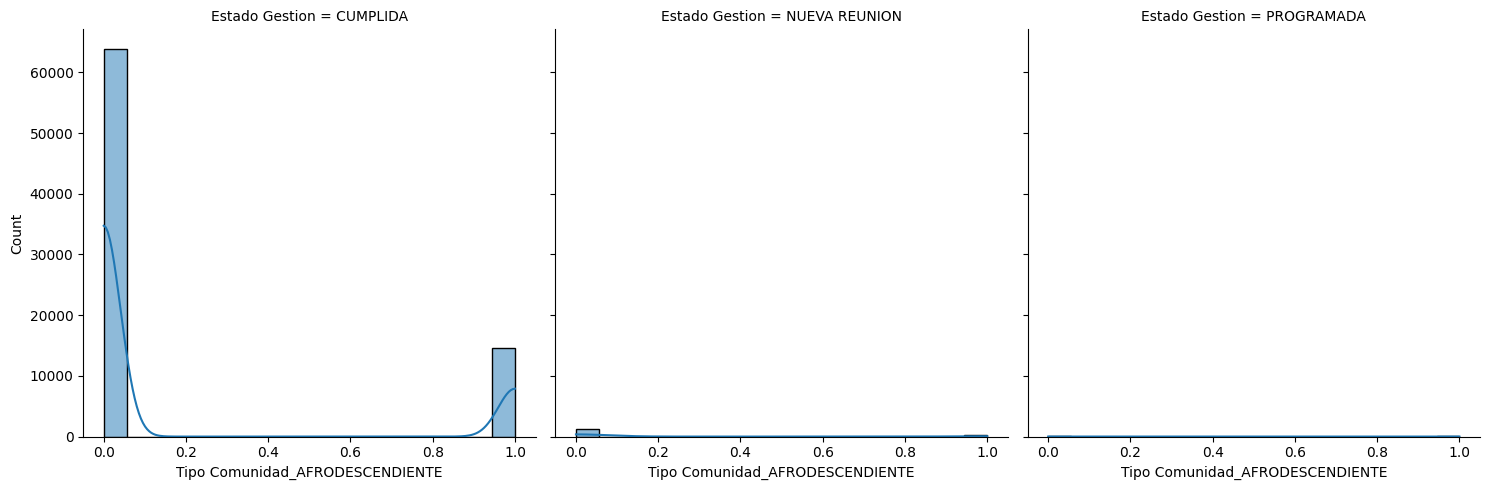

In [ ]:
sns.displot(data=conT,
            x="Tipo Comunidad_AFRODESCENDIENTE",
            kde=True,
            col="Estado Gestion");

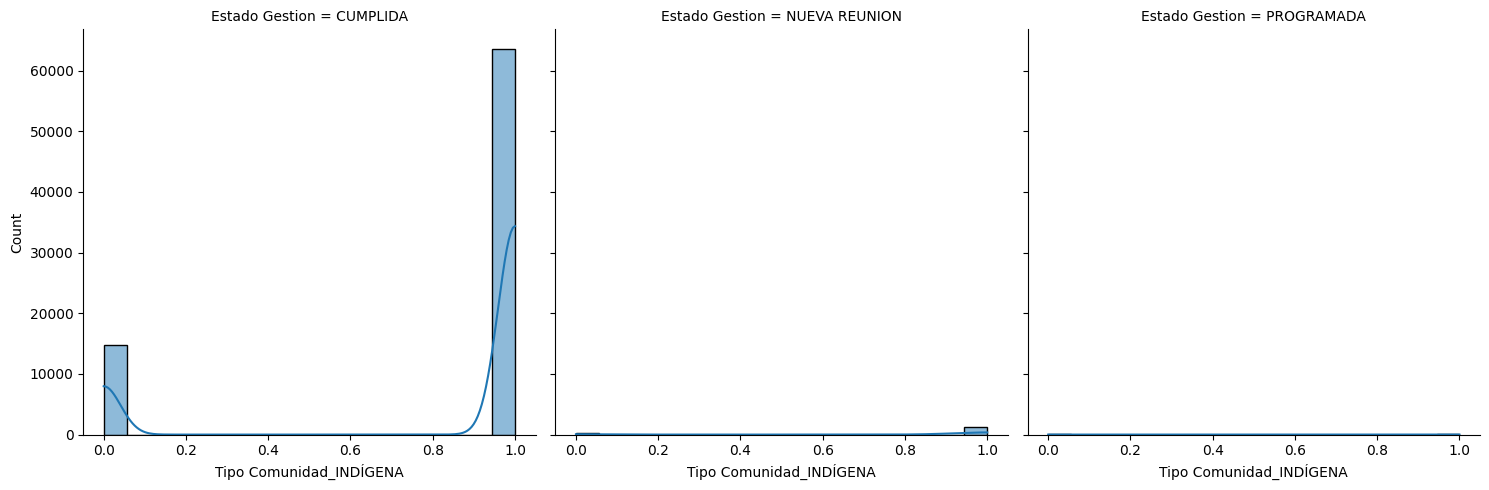

In [ ]:
sns.displot(data=conT,
            x="Tipo Comunidad_INDÍGENA",
            kde=True,
            col="Estado Gestion");

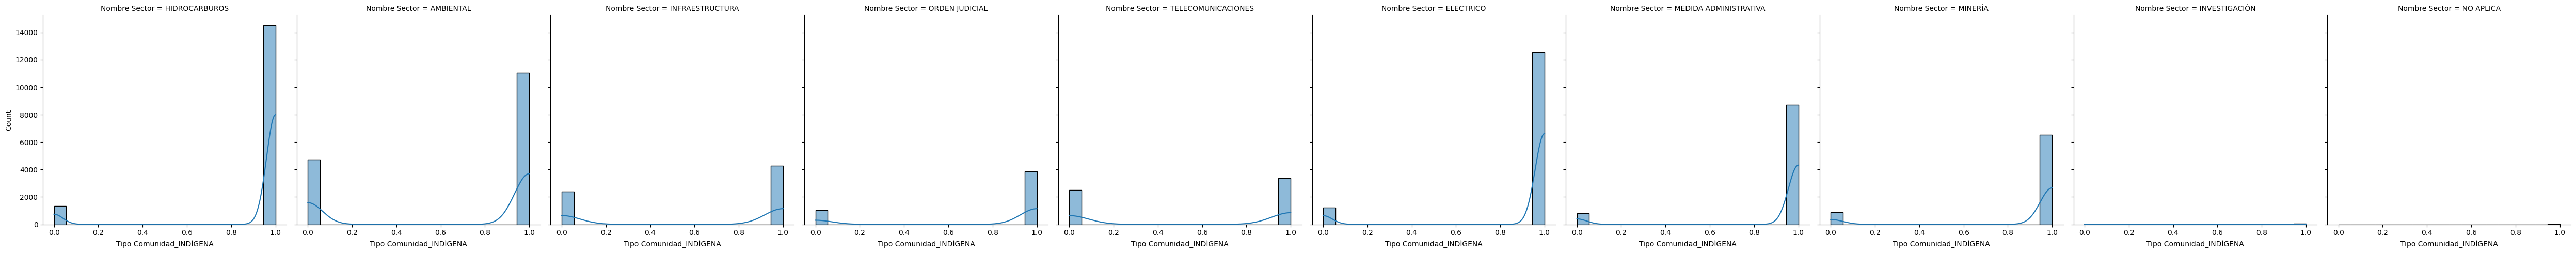

In [ ]:

sns.displot(data=conT,
            x="Tipo Comunidad_INDÍGENA", #POMCAS plan de ordenamiento y  manejo de cuencas hidrograficas
            kde=True,
            col="Nombre Sector");

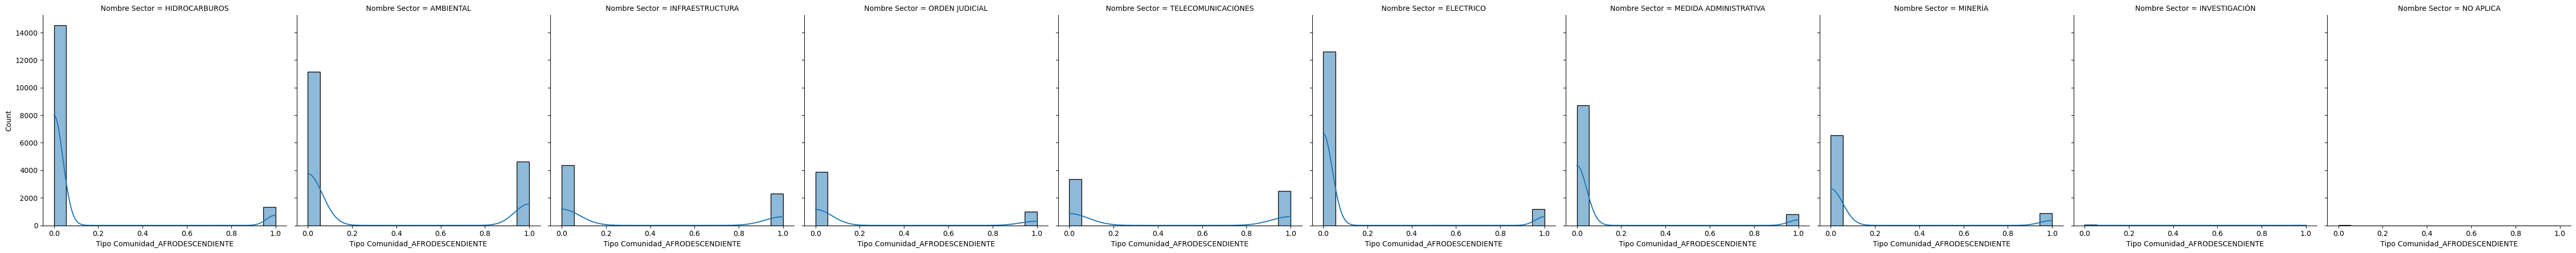

In [ ]:

sns.displot(data=conT,
            x="Tipo Comunidad_AFRODESCENDIENTE", #POMCAS plan de ordenamiento y  manejo de cuencas hidrograficas
            kde=True,
            col="Nombre Sector");

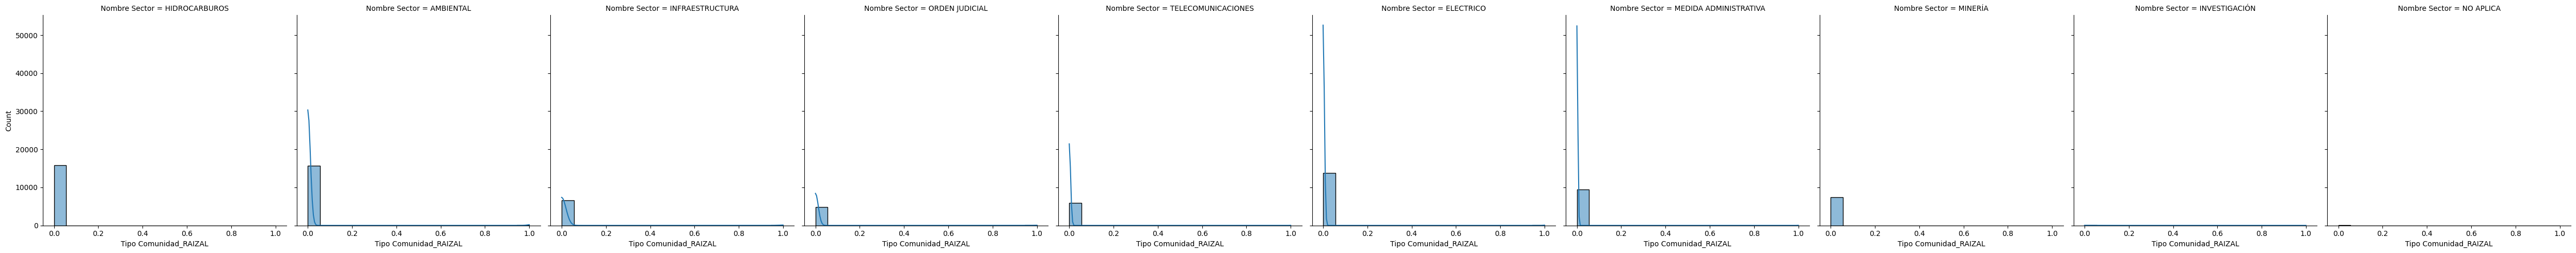

In [ ]:

sns.displot(data=conT,
            x="Tipo Comunidad_RAIZAL", #POMCAS plan de ordenamiento y  manejo de cuencas hidrograficas
            kde=True,
            col="Nombre Sector");

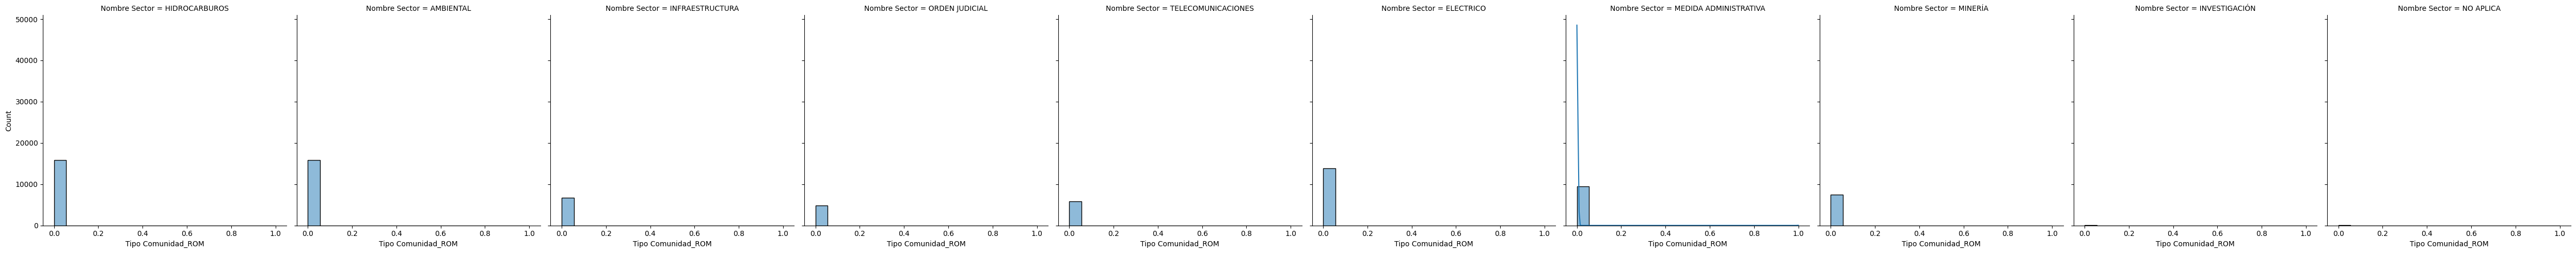

In [ ]:
sns.displot(data=conT,
            x="Tipo Comunidad_ROM",
            kde=True,
            col="Nombre Sector");

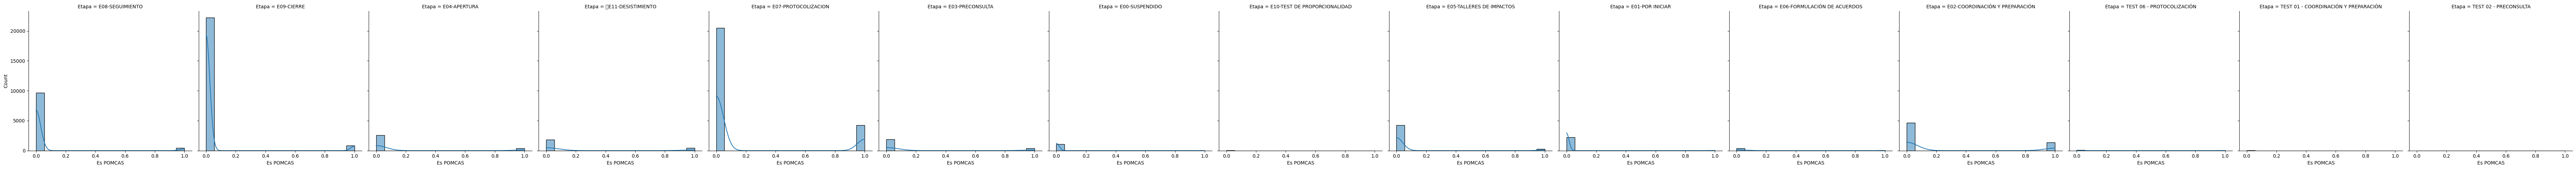